<a href="https://colab.research.google.com/github/alexleonsoria/ai-ml-algorithms/blob/master/Analyzing_a_dataset_and_implementing_a_neural_network_for_deep_learning_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Display the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
# Check for missing values
print(data.isnull().sum())

# Display basic statistics
print(data.describe())

# Check the distribution of the target variable
print(data['Outcome'].value_counts())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedig

Step 2: Preprocessing the data

Objective
Before implementing the neural network, the data must be preprocessed. This includes normalizing the features and splitting the dataset into training and test sets.

Steps
1. Feature scaling
Neural networks perform better when the features are scaled to a similar range. We’ll scale the feature values to a range between 0 and 1 using MinMaxScaler.

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

2. Splitting the dataset

Split the dataset into training and testing sets. Typically, 80 percent of the data is used for training and 20 percent for testing.


In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Step 3: Implementing a deep learning neural network

Objective
You will implement a deep learning neural network using TensorFlow’s Keras API to predict whether a patient has diabetes.

Steps
1. Build the neural network
We’ll create a simple feedforward neural network with two hidden layers.

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    layers.Dense(32, activation='relu'),  # Second hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2. Compile the model

Compile the model using binary cross-entropy loss (suitable for binary classification) and the adaptive moment estimation (Adam) optimizer.

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

3. Train the model

Train the model using the training dataset, and validate its performance using the test dataset. We’ll train for 50 epochs.

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4659 - loss: 0.6952 - val_accuracy: 0.6429 - val_loss: 0.6690
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6489 - loss: 0.6628 - val_accuracy: 0.6429 - val_loss: 0.6600
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6601 - loss: 0.6499 - val_accuracy: 0.6429 - val_loss: 0.6514
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6718 - loss: 0.6333 - val_accuracy: 0.6429 - val_loss: 0.6400
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6311 - loss: 0.6385 - val_accuracy: 0.6558 - val_loss: 0.6284
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6638 - loss: 0.6157 - val_accuracy: 0.6688 - val_loss: 0.6164
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6927 - loss: 0.5882 - val_accuracy: 0.6688 - val_loss: 0.6040
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6872 - loss: 0.5999 - val_accuracy: 0.6688 - val_loss

Step 4: Evaluating the results

Objective
Evaluate the model's performance using accuracy and visualize the training process with loss and accuracy plots.

Steps
1. Evaluate the model on test data
After training, evaluate the model’s accuracy on the test dataset.

In [10]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7628 - loss: 0.5186 
Test Accuracy: 0.7792207598686218


2. Plot accuracy and loss

Use Matplotlib to plot the model's training and validation accuracy and loss over time to observe its performance.

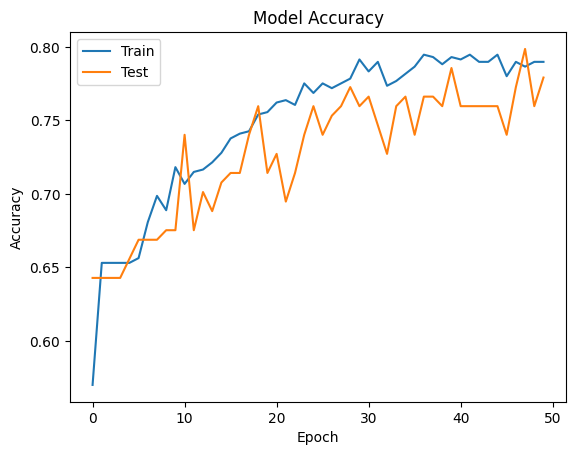

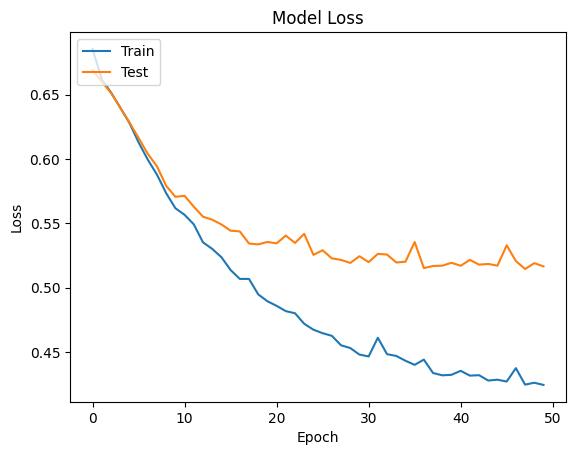

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()